## Violinplot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import warnings;
warnings.filterwarnings('ignore')

In [2]:
cars = sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
cars.shape

(392, 9)

In [4]:
sns.set_style('whitegrid')

In [5]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [6]:
cars = cars[cars.cylinders.isin([4,6,8])]

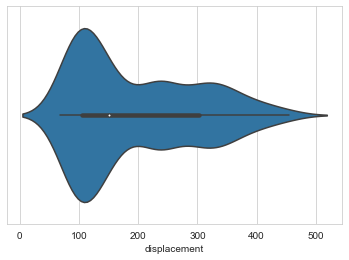

In [7]:
sns.violinplot(cars.displacement);

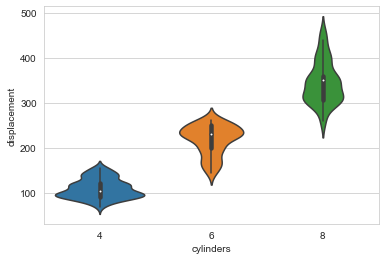

In [8]:
sns.violinplot(x=cars.cylinders, y=cars.displacement);
# sns.violinplot(x='cylinders', y='displacement', data=cars);

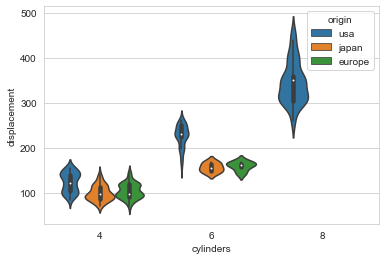

In [9]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', data=cars);

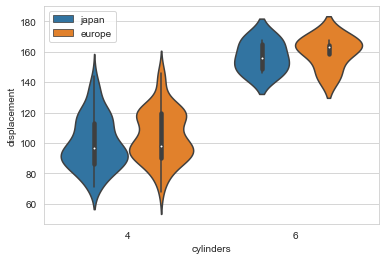

In [13]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', data=cars[cars.origin.isin(['japan', 'europe'])])
plt.legend(loc=2);

## Split

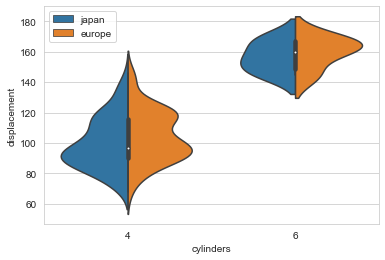

In [14]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', 
               data=cars[cars.origin.isin(['japan', 'europe'])], split=True)
plt.legend(loc=2);

## Inner

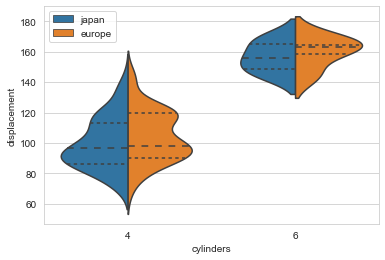

In [15]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', 
               data=cars[cars.origin.isin(['japan', 'europe'])], split=True, inner='quartiles')
plt.legend(loc=2);

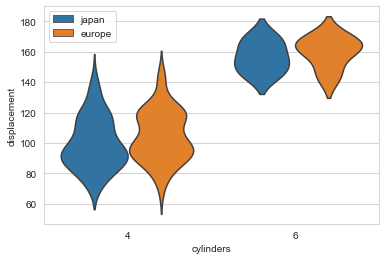

In [23]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', 
               data=cars[cars.origin.isin(['japan', 'europe'])], inner=None)
plt.legend(loc=2);

## Scale

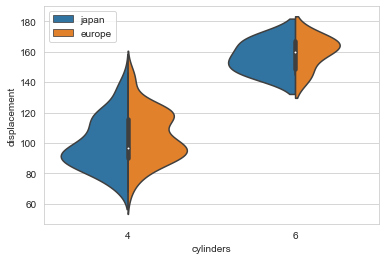

In [16]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', 
               data=cars[cars.origin.isin(['japan', 'europe'])], split=True, scale='count')
plt.legend(loc=2);

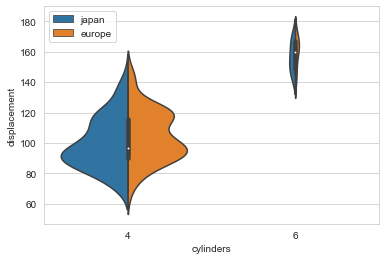

In [17]:
sns.violinplot(x='cylinders', y='displacement', hue='origin', 
               data=cars[cars.origin.isin(['japan', 'europe'])], split=True, scale='count', scale_hue=False)
plt.legend(loc=2);

In [18]:
(
    cars[cars.origin.isin(['japan', 'europe'])]
    .groupby('cylinders')
    .origin
    .value_counts()
)

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: origin, dtype: int64

## Styling

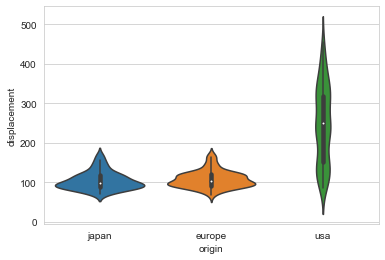

In [19]:
sns.violinplot(x=cars.origin, y=cars.displacement,
               order=['japan', 'europe', 'usa']
              );

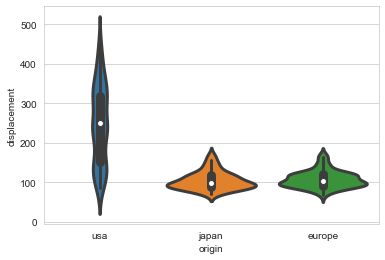

In [20]:
sns.violinplot(x=cars.origin, y=cars.displacement, 
               linewidth=3
              );

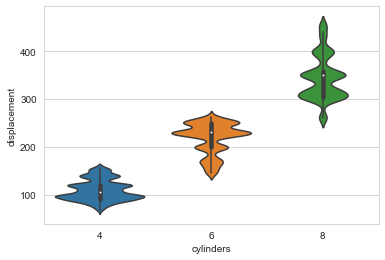

In [21]:
# KDE Options

sns.violinplot(x=cars.cylinders, y=cars.displacement, bw=0.2);

## EXAMPLES

In [30]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


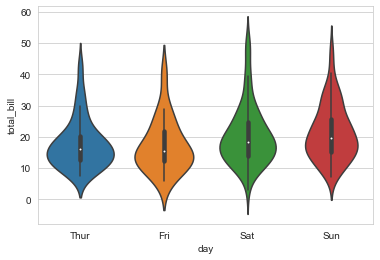

In [31]:
sns.violinplot(x='day', y='total_bill', data=tips);

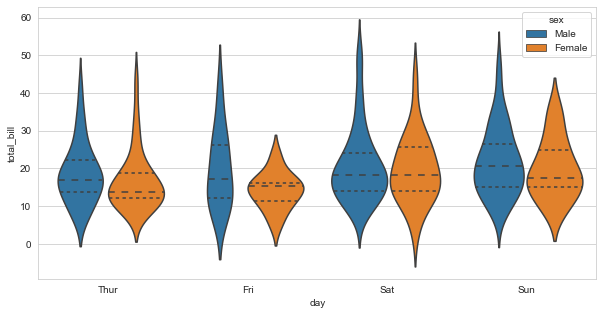

In [32]:
plt.figure(figsize=(10,5))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', inner='quartile');

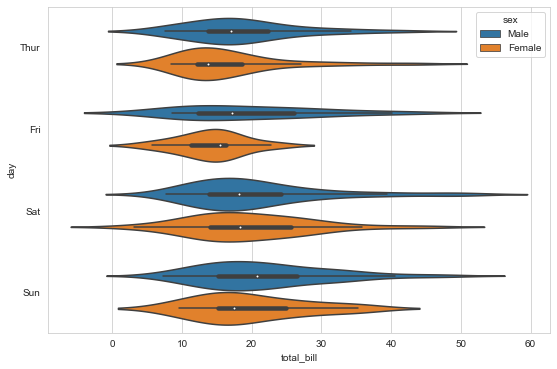

In [33]:
plt.figure(figsize=(9,6))
sns.violinplot(y='day', x="total_bill",data=tips, hue="sex");

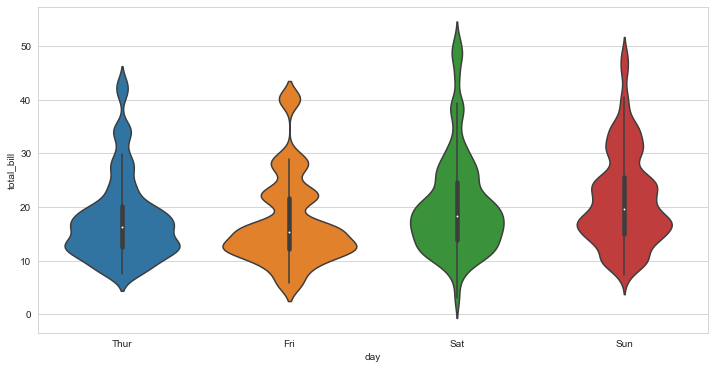

In [34]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y='total_bill', data=tips, bw=0.2);

In [35]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

In [36]:
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

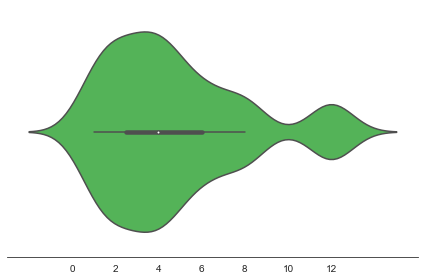

In [38]:
sns.set_style('white')

plt.figure(figsize=(6,4))
sns.violinplot(pts, color='#44C34A', bw=0.3, cut=3)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

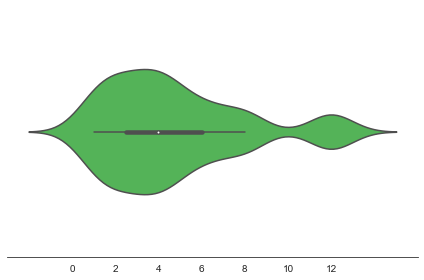

In [39]:
plt.figure(figsize=(6,4))
sns.violinplot(pts, color='#44C34A', bw=0.3, cut=3, width=0.5)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();